In [0]:
import pandas as pd 
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('Extra_Train_1.csv')
data = data.drop(['geometry', 'Unnamed: 0'], axis = 1)
data_old = pd.read_csv('Train.csv')
data.head()
#in range(21,-1) we have 2019 predictors

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID,wetland_dist,soil_carbon
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41,15953.465740,4.751131
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41,16265.216010,4.977375
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41,16645.902409,3.393665
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41,17087.784546,3.393665
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41,17589.245651,3.167420


In [77]:
data_old['wetland_dist'] = data['wetland_dist']
data_old['soil_carbon'] = data['soil_carbon']
data_old.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID,wetland_dist,soil_carbon
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41,15953.465740,4.751131
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41,16265.216010,4.977375
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41,16645.902409,3.393665
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41,17087.784546,3.393665
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41,17589.245651,3.167420


In [0]:
data_old.query('Y==-15.43&X==35.72')

In [0]:
data_old.query('target_2015>0.0').iloc[56,:]

In [0]:
data_old.query('target_2015>0.8').iloc[3,4:21].T.plot()

In [0]:
list_max = []
for index in range(data_old.shape[0]):
  line = data_old.iloc[index]
  if (line[2]-0.96)>=0.:
    list_max.append((line[0],line[1]))
list_max[:4]

In [0]:
data_old['distance_flood'] = 0.

In [0]:
def asnul(x):
  """Replace less then zeros to zeros for all DF"""
  r = x
  if r[1]<0:
    r[1] = 0.0
  if r[1] > 1:
    r[1] = 1.0
  return r
def distance(x):
  r = x
  if (r[5]-0.96)>=0.:
    r[-1] = 0.
    return r
  min_dist = 3.
  for i in range(len(list_max)):
    min_dist = np.min([min_dist, np.sqrt((r[3]-list_max[i][0])**2+(r[4]-list_max[i][1])**2)])
  r[-1] = min_dist
  return r

In [0]:
def knull(x):
  """Count number of zeros"""
  r = x
  summ = 0
  for i in range(6,len(r)-1):
    summ+=r[i]
  r[-1] = summ/(r[5]*1000)
  return r

In [0]:
sns.jointplot(x='X', y='Y', data = data.loc[data.LC_Type1_mode==17][['X','Y']])
sns.jointplot(x='X', y='Y', data = data[['X','Y']])

0 -- 0.1999240675
1 -- 0.3989935753
2 -- 0.5992720367000001
3 -- 0.7981706545
4 -- 0.9998101025


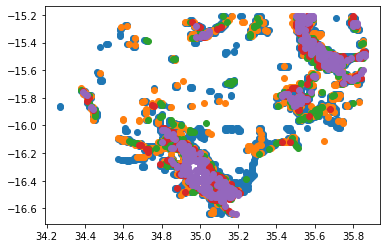

In [0]:
prosses = data_old[['X', 'Y', 'target_2015']]
values = []
for i in range(5):
  values.append(data_old.query('target_2015>@i*0.2&target_2015<(@i+1)*0.2'))
figure = plt.figure()
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2015.max())
plt.show()

In [0]:
def asminus(x):
  if x<0.18:
    return 0.
  if x>1:
    return 1
  return x
def delete(x):
  r = x
  if r[1]<35.65 or r[2]>-15.53:
    r[-1]=0.
  return r

In [120]:
best = pd.read_csv('Submission_score= (21).csv')
best = best.merge(data_old[['Square_ID', 'X', 'Y']], on='Square_ID')
y_best = best.target_2019
best = best.rename(columns = {'target_2019': 'target'})
values = []
for i in range(5):
  values.append(best.query('target_2019>@i*0.2&target_2019<(@i+1)*0.2'))
figure = plt.figure()
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2019.max())
plt.show()

UndefinedVariableError: ignored

0 -- 0.19992746054800015
1 -- 0.3985881681846424
2 -- 0.5986021415083888
3 -- 0.799247530503902
4 -- 0.8710739587427638


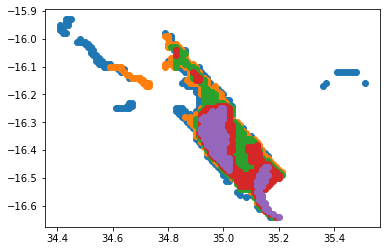

In [63]:
second = pd.read_csv('Submission_score= (27).csv')
second = second.merge(data_old[['Square_ID', 'X', 'Y']], on='Square_ID')
values = []
for i in range(5):
  values.append(second.query('target_2019>@i*0.2&target_2019<(@i+1)*0.2'))
figure = plt.figure()
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2019.max())
plt.show()

In [64]:
second = second.rename(columns = {'target_2019': 'target'})
best = best.merge(second, on=['Square_ID','X','Y'])
best.query('target>0|target_2019>0').shape

(999, 5)

In [0]:
best['mean'] = (best.target_2019 + best.target)/2

In [66]:
best.head()

,Square_ID,target_2019,X,Y,target,mean
0,4e3c3898-14ce-11ea-bce5-f49634744a41,0.0,34.26,-15.89,0.0,0.0
1,4e3c3899-14ce-11ea-bce5-f49634744a41,0.0,34.26,-15.88,0.0,0.0
2,4e3c389a-14ce-11ea-bce5-f49634744a41,0.0,34.26,-15.87,0.0,0.0
3,4e3c389b-14ce-11ea-bce5-f49634744a41,0.0,34.26,-15.86,0.0,0.0
4,4e3c389c-14ce-11ea-bce5-f49634744a41,0.0,34.26,-15.85,0.0,0.0


In [0]:
best.drop(['target_2019', 'target', 'X', 'Y'], axis = 1).rename(columns = {'mean': 'target_2019'}).to_csv('submit.csv', index = False)

0 -- 0.19833324390786652
1 -- 0.3974863295159162
2 -- 0.5993677149679615
3 -- 0.79985225140599
4 -- 0.8913998601530337


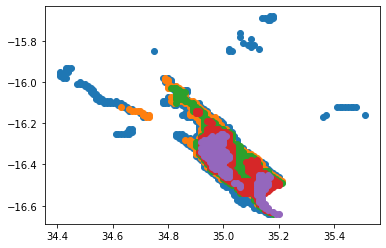

In [22]:
values = []
for i in range(5):
  values.append(best.drop(['target_2019', 'target'], axis = 1).rename(columns = {'mean': 'target_2019'}).query('target_2019>@i*0.2&target_2019<(@i+1)*0.2'))
figure = plt.figure()
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2019.max())
plt.show()

In [70]:
target_2019 = 0
target = 0
maxim = 0
for index in range(best.shape[0]):
  line = best.iloc[index]
  if line[1]>line[-1]:
    target_2019+=1
    maxim = np.mean([maxim, (line[1]-line[-1])])
  elif line[1]<line[-1]:
    target+=1
print(target_2019, target)
print(maxim)

664 335
0.022573584907550306


In [0]:
best['new'] = 0

In [0]:
def MN(x):
  r = x
  r[-1] = (r[1]+r[5])/2
  return r
best = best.apply(MN, axis = 1)
best.drop(['target_2019', 'target', 'X', 'Y', 'mean'], axis = 1).rename(columns = {'new': 'target_2019'}).to_csv('subm.csv', index = False)

0 -- 0.19984871912236388
1 -- 0.3986937201627358
2 -- 0.5989029963681661
3 -- 0.7994206826000272
4 -- 0.9446549158384768


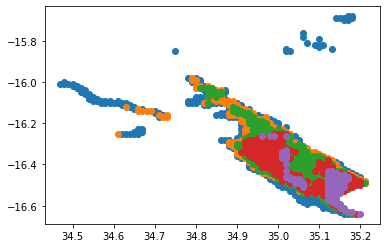

In [0]:
def podgon(x):
  r = x
  if r[1] < r[-1]:
    r[1] = r[1]/1.3
  return r
best = best.apply(podgon, axis = 1)
values = []
for i in range(5):
  values.append(best.query('target_2019>@i*0.2&target_2019<(@i+1)*0.2'))
figure = plt.figure()
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2019.max())
plt.show()

In [0]:
best.drop(['X','Y','target'], axis = 1).to_csv('Submission_with_del.csv', index = False)

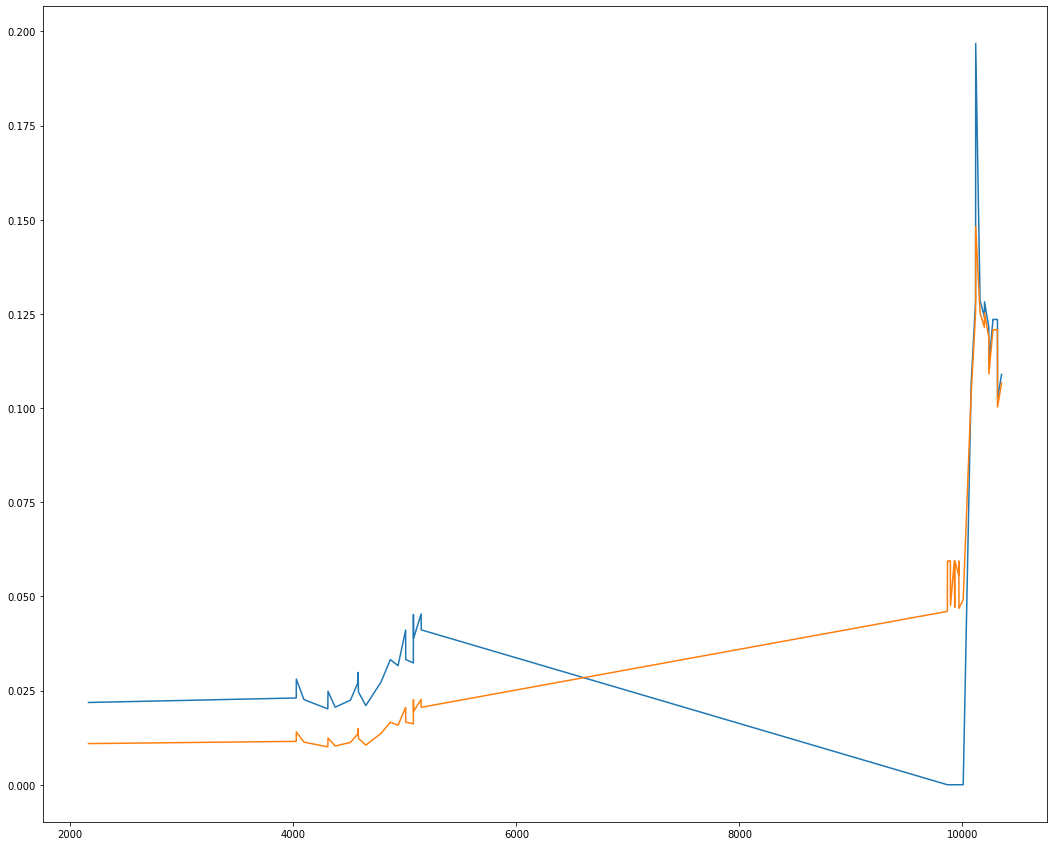

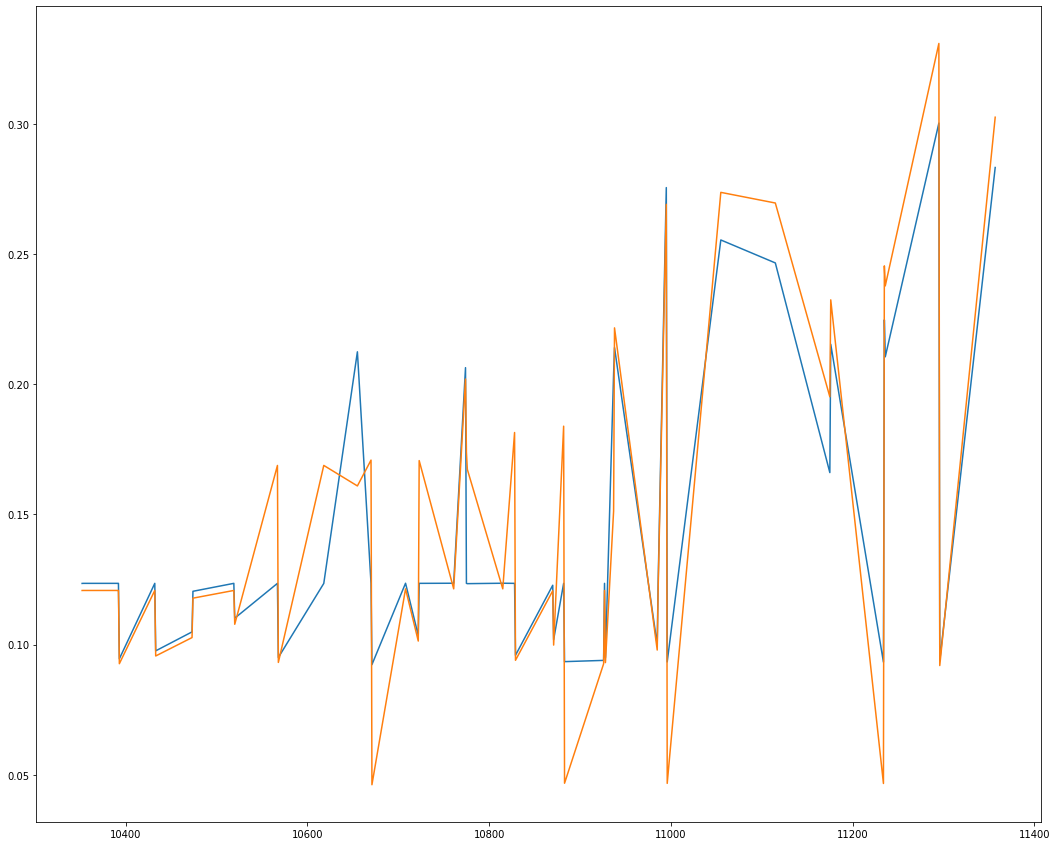

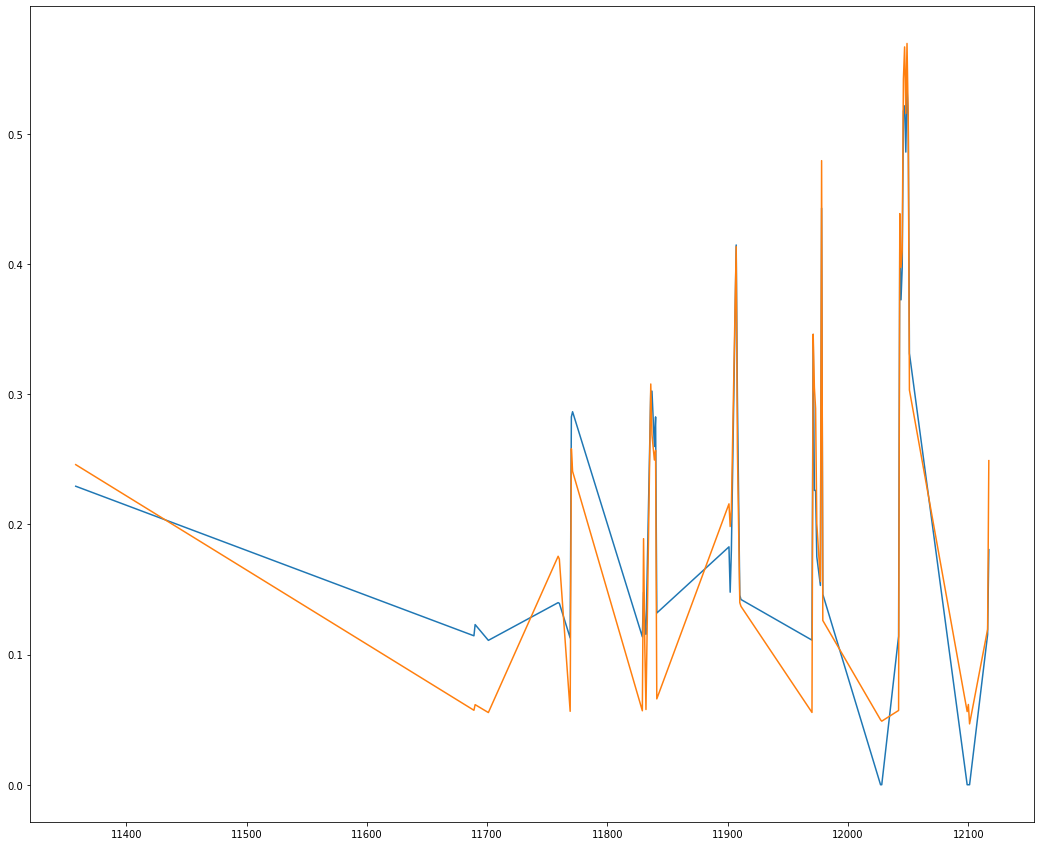

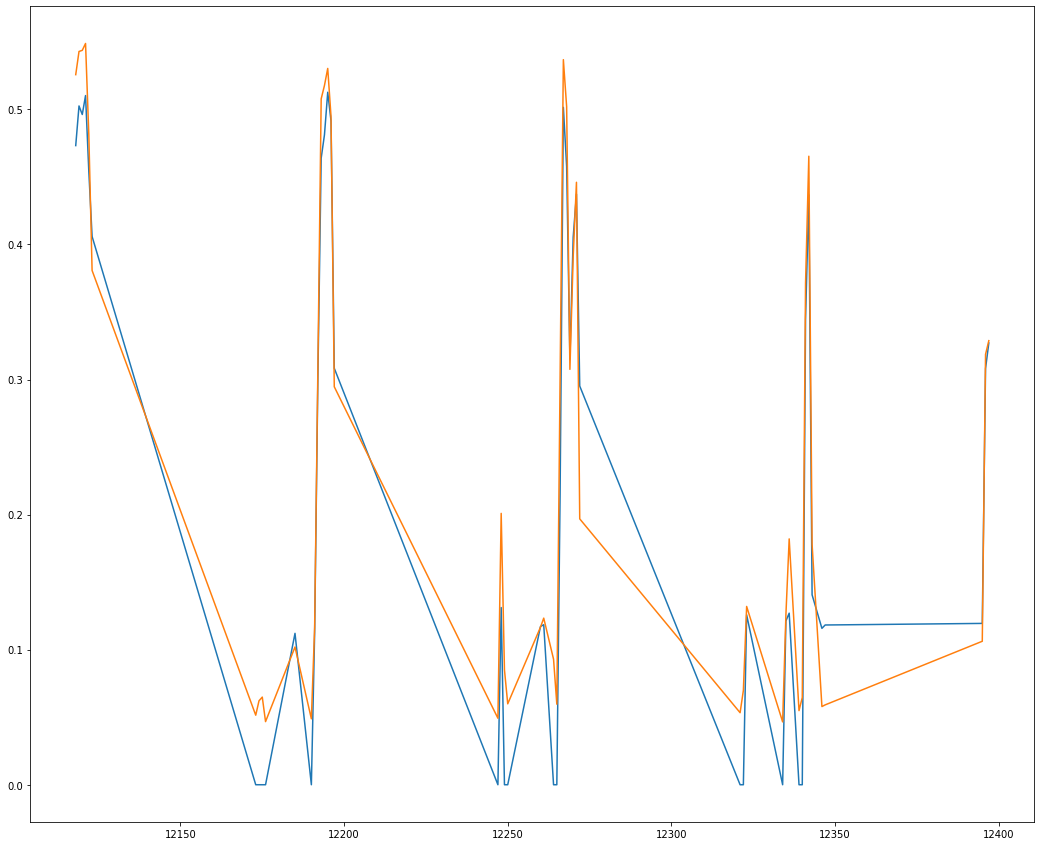

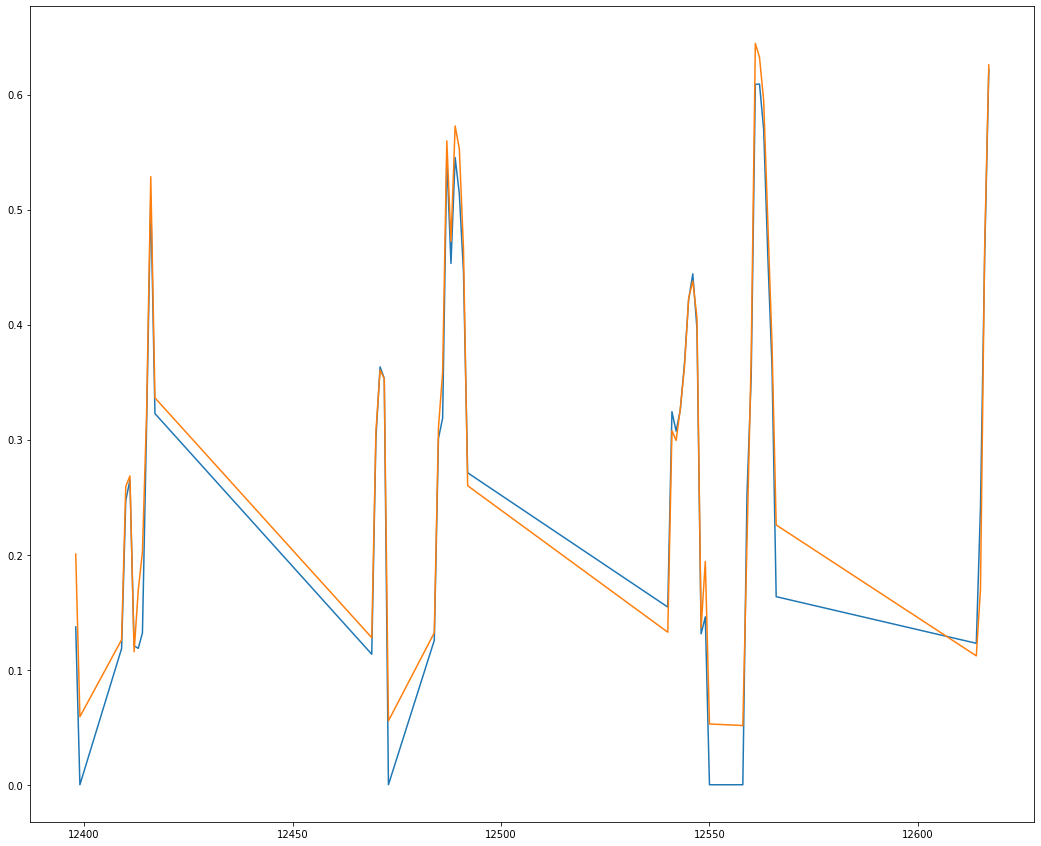

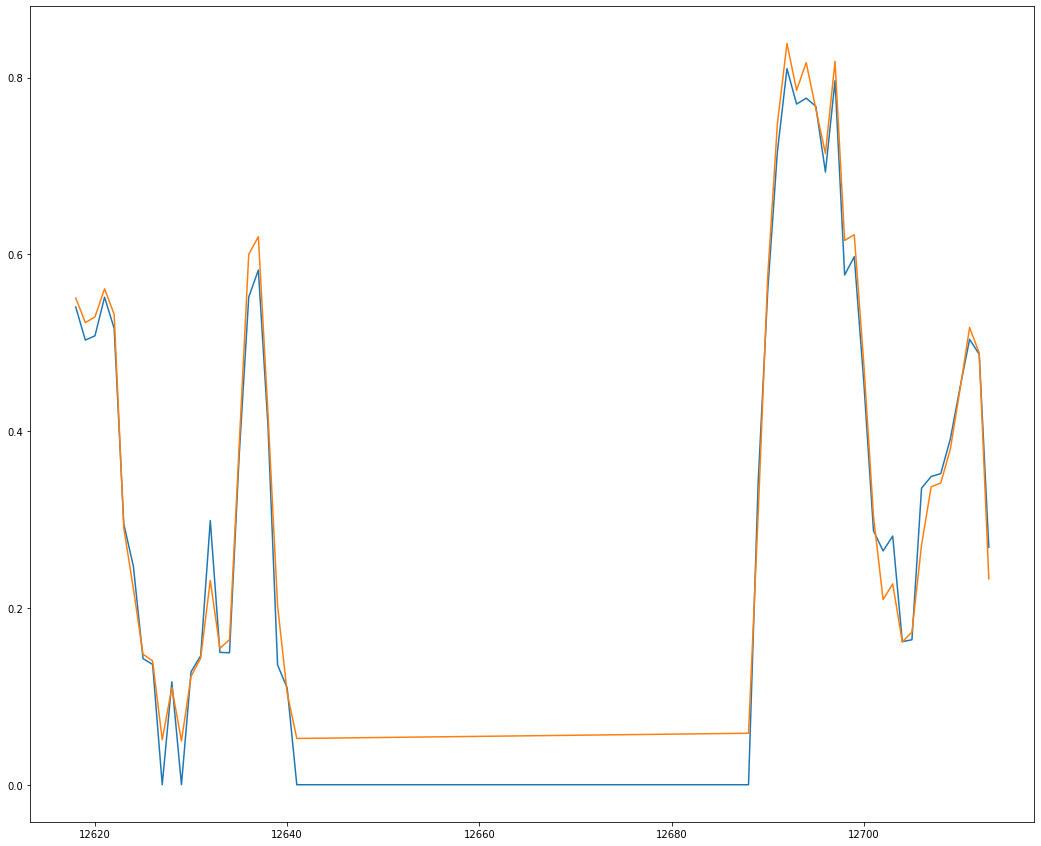

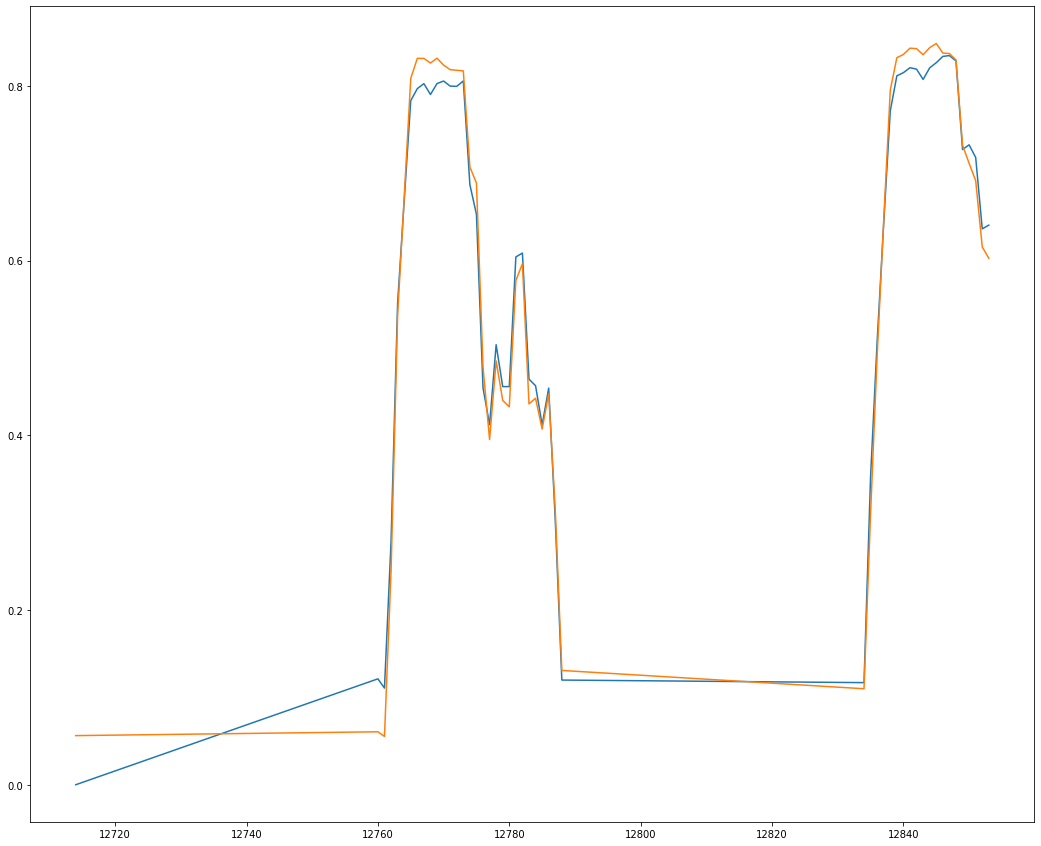

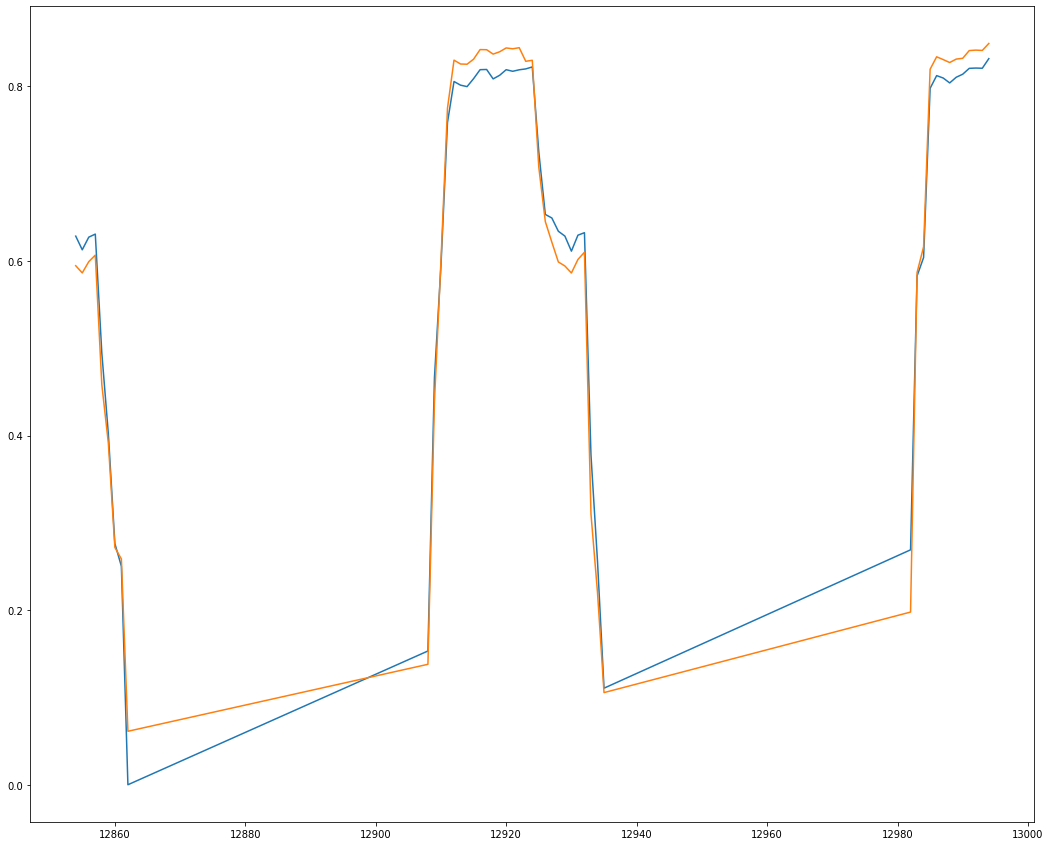

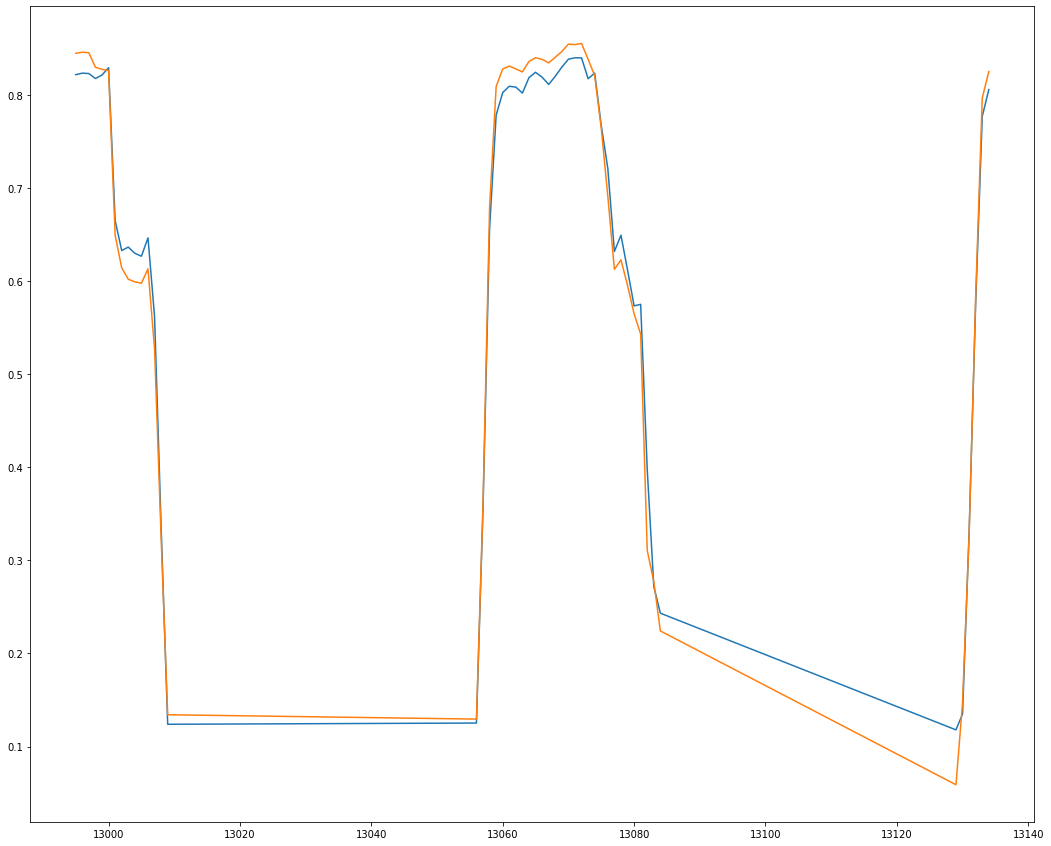

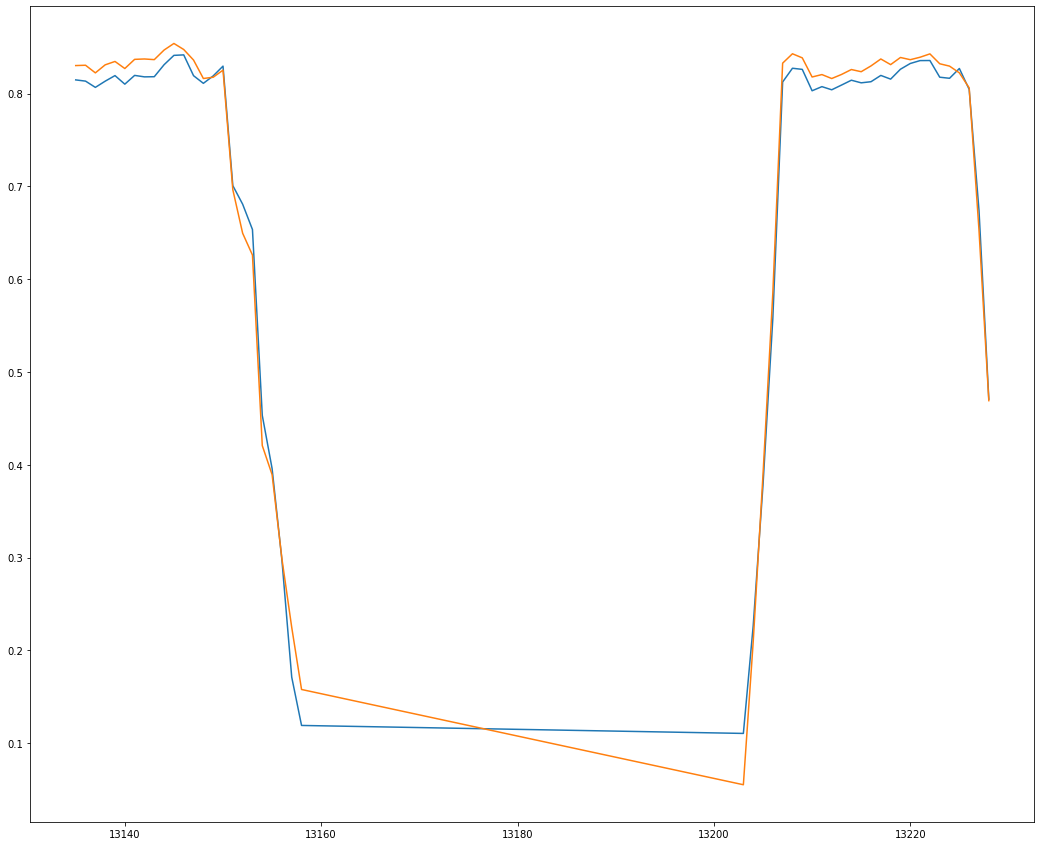

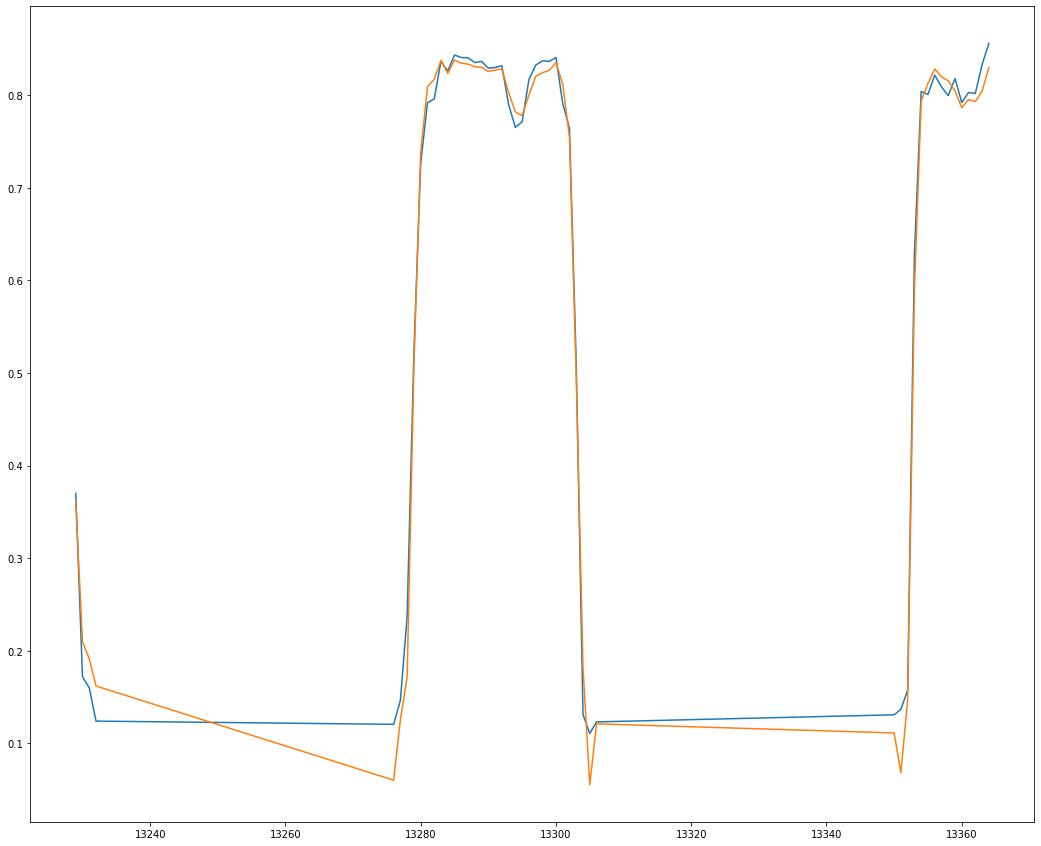

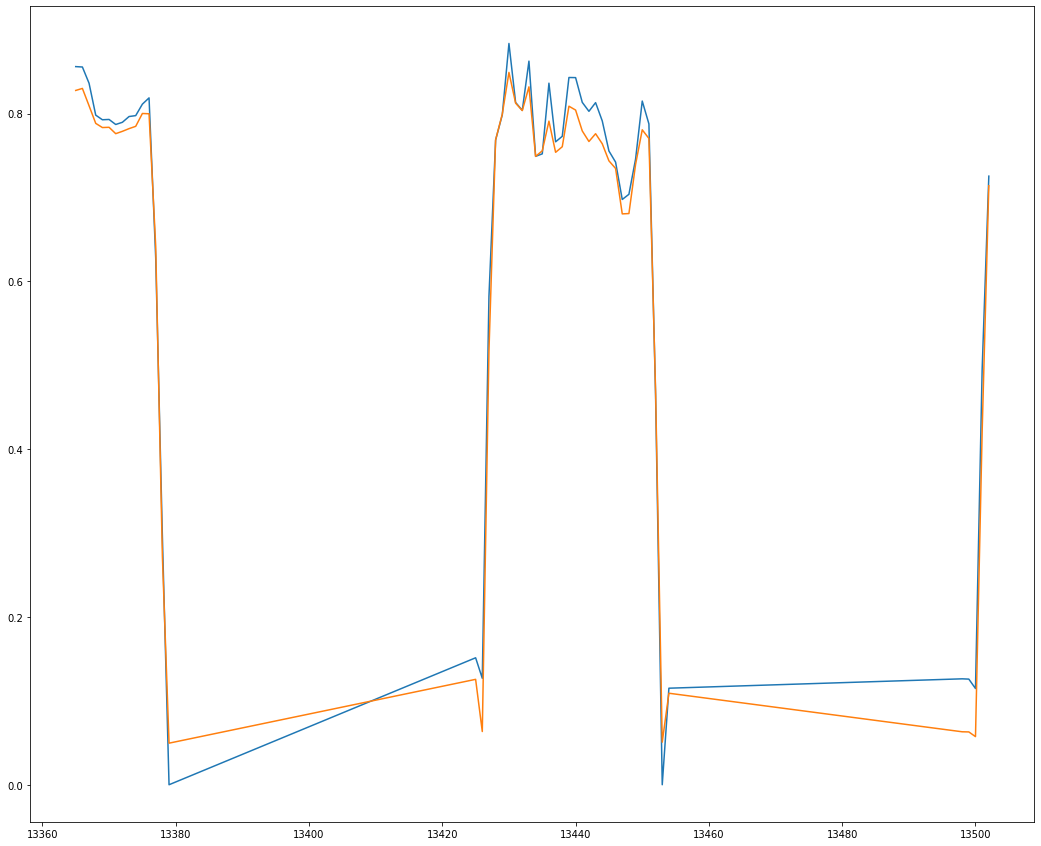

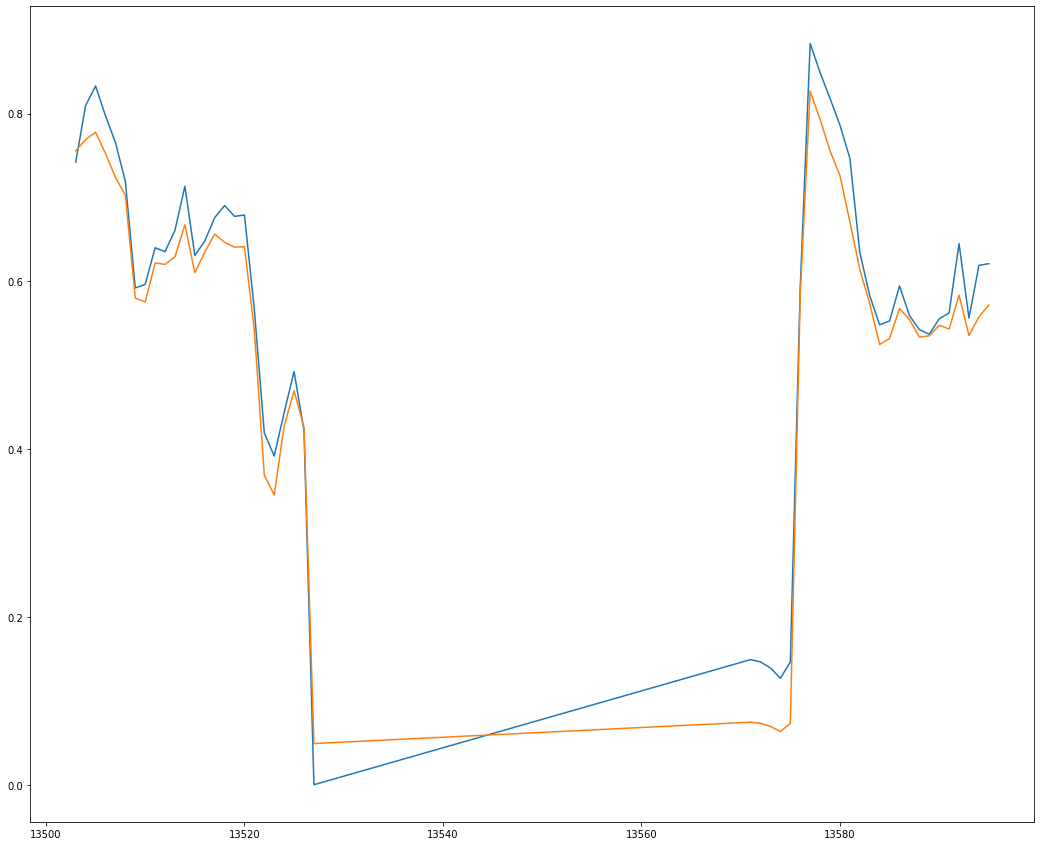

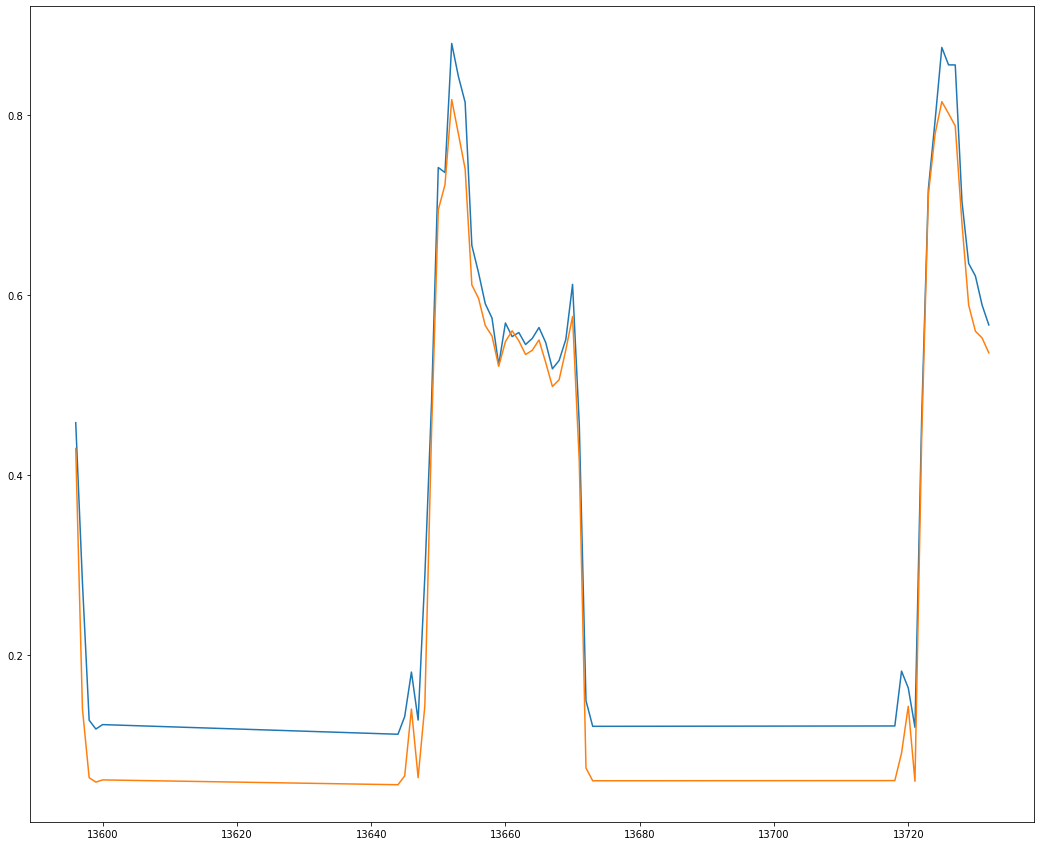

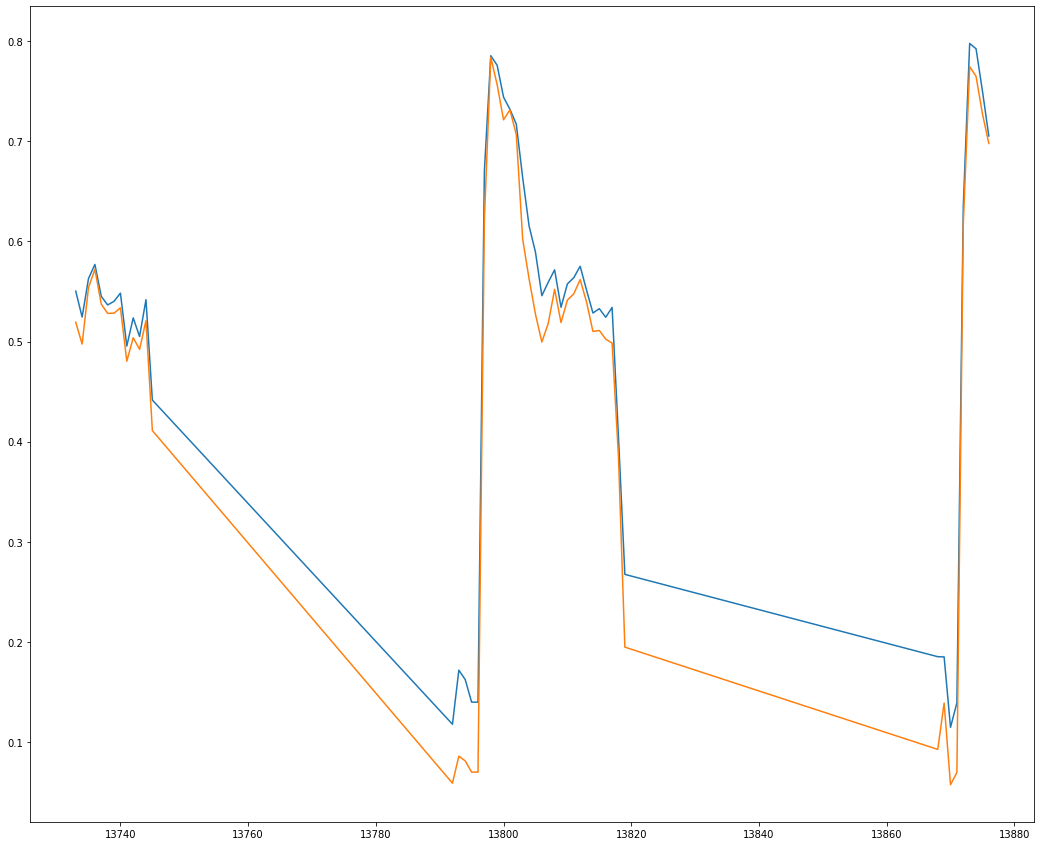

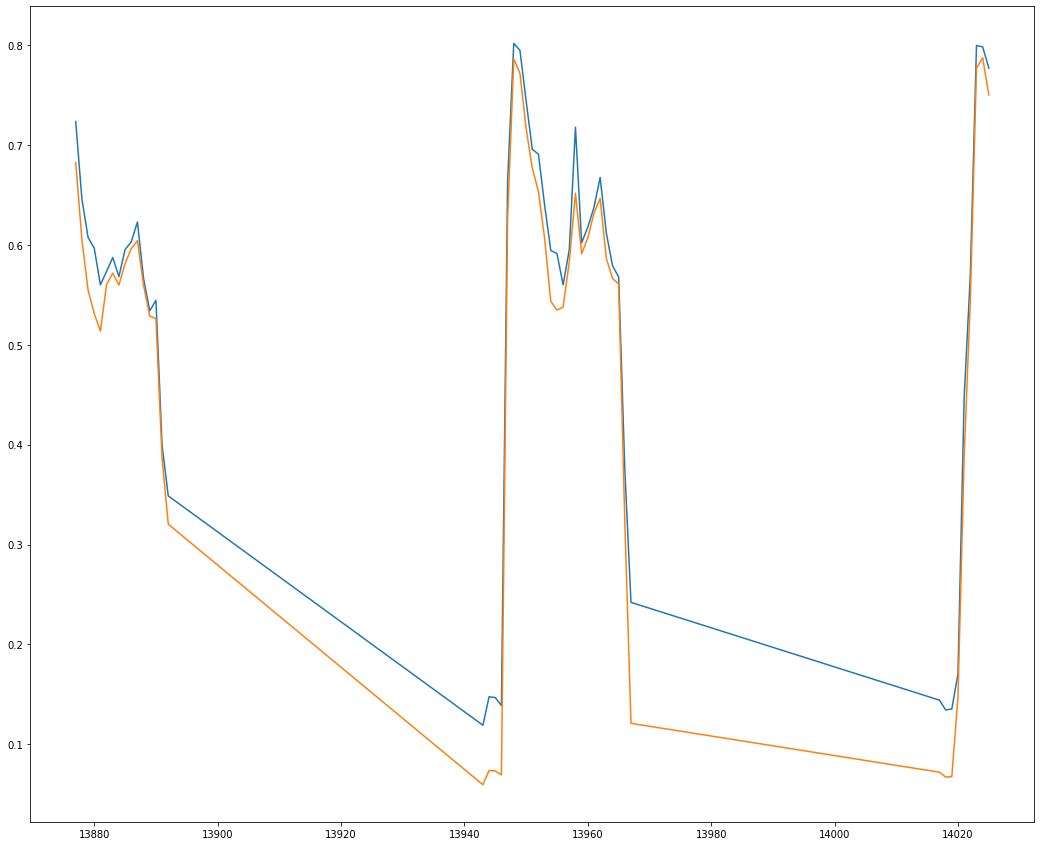

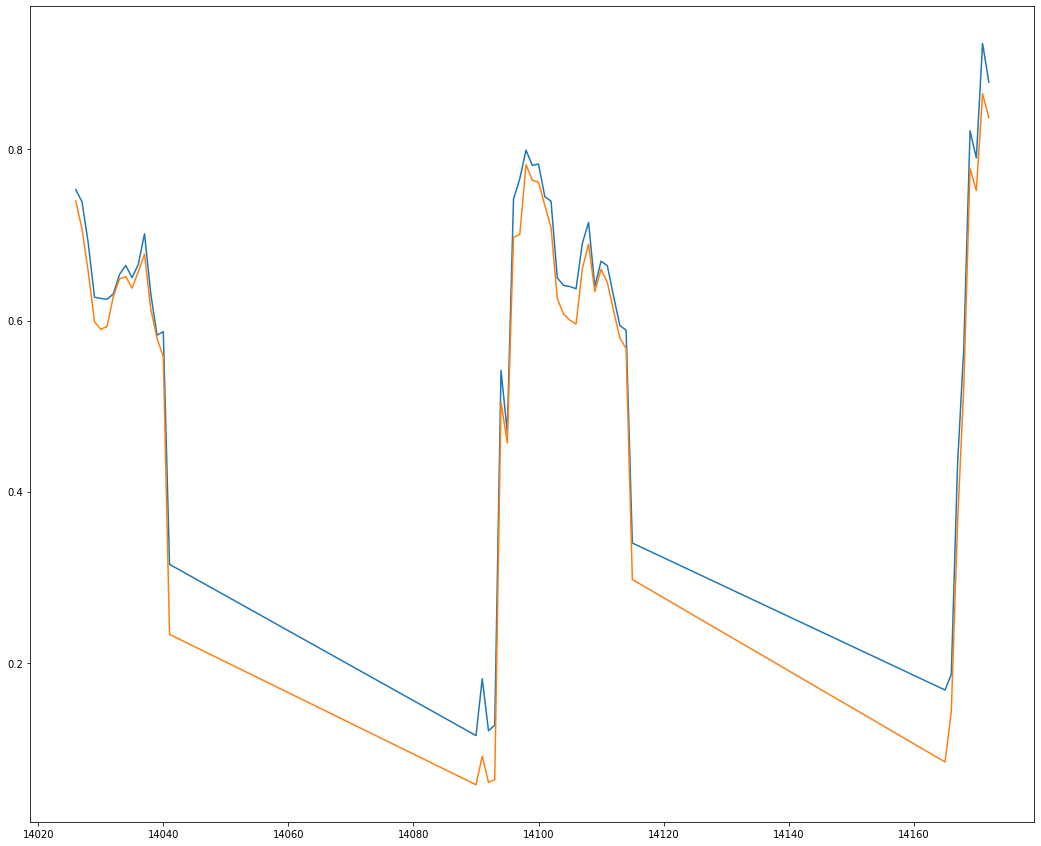

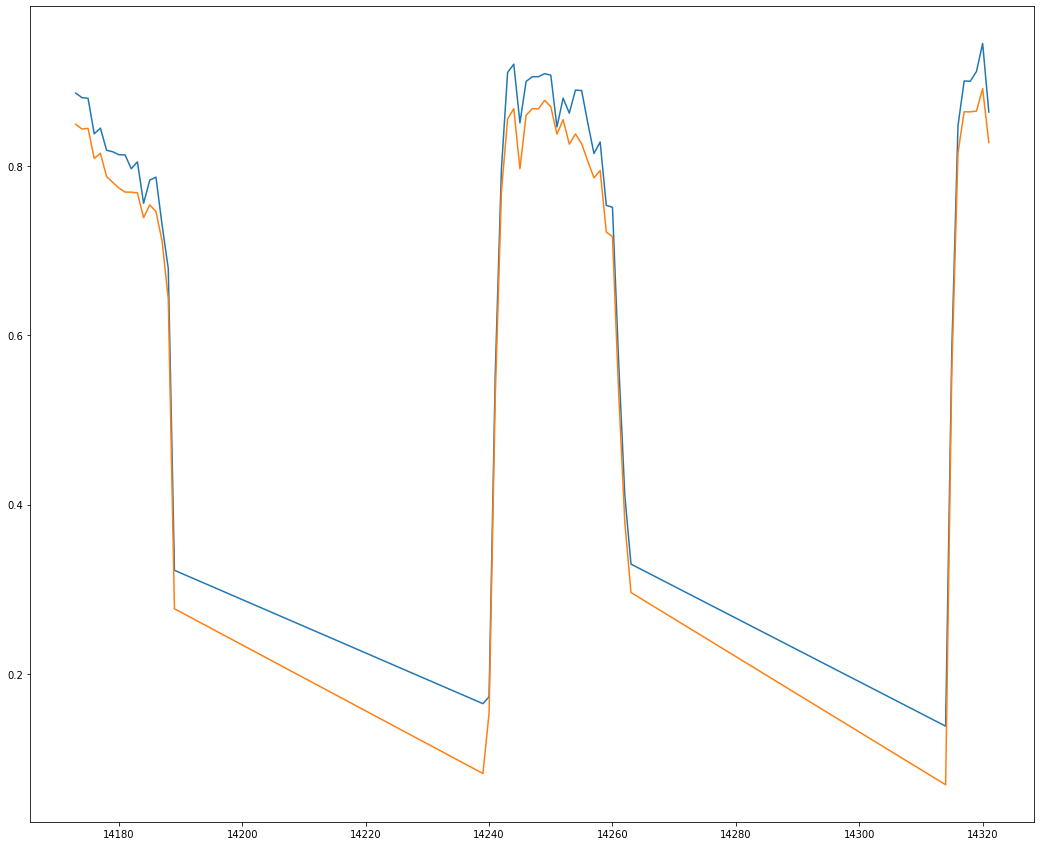

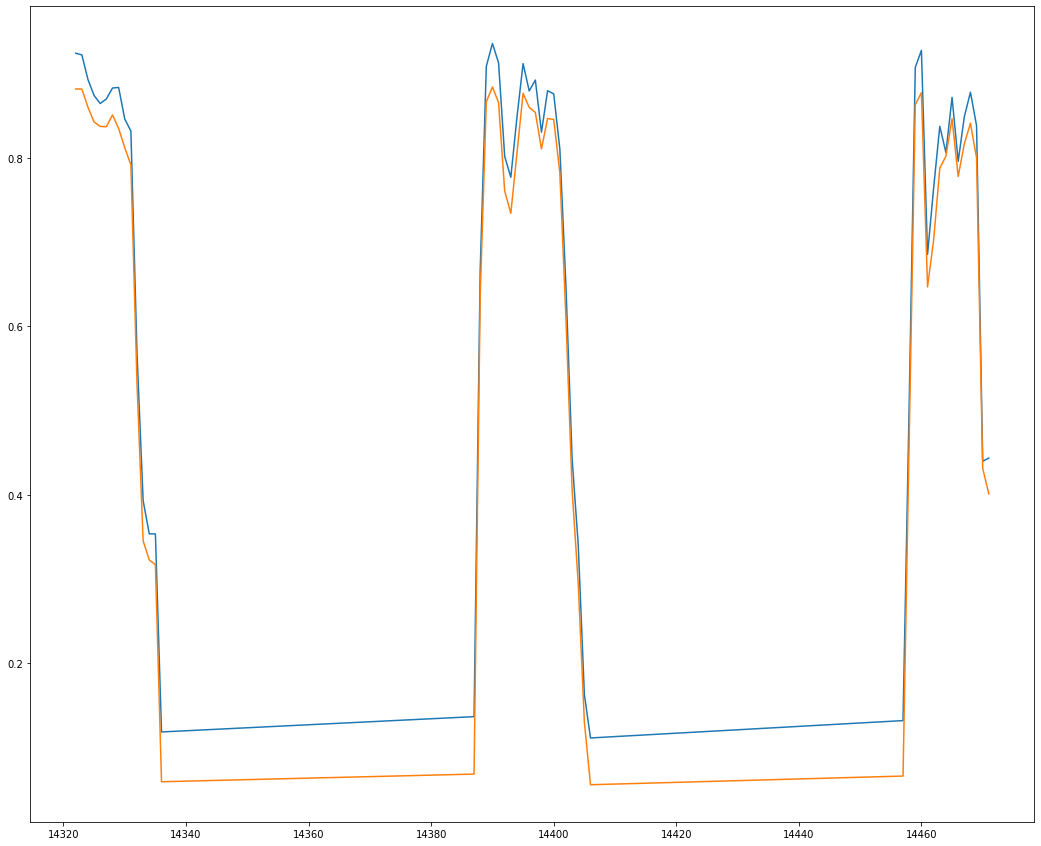

In [69]:
for i in range(50,999,50):
  figure = plt.figure(figsize=(18,15))
  plt.plot(best.query('mean>0|target_2019>0').iloc[i-50:i].target_2019)
  plt.plot(best.query('mean>0|target_2019>0').iloc[i-50:i]['mean'])
  #plt.plot(fresh.iloc[:50]['mean'])
  plt.show()

In [91]:
"""Лучшая модель для верхней части координат"""
X = data_old.query('Y>-15.9').iloc[:,[-4,-1,-2,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
X = pd.DataFrame(X.values, columns = range(23))
X['volume'] = 0
X = X.apply(knull, axis = 1)
X = X.fillna(0)
X = X.apply(distance, axis = 1)
X = X.iloc[:,[2,3,4,-2,-1]].rename(columns = {2:'wetland_dist', 3:'X', 4:'Y'})
y = data_old.query('Y>-15.9').iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
model_lgb_up = lgb.LGBMRegressor(n_estimators=900, max_depth=6, learning_rate=0.2)
model_lgb_up.fit(X_train,y_train)
print('CV =', cross_val_score(model_lgb_up, X_test, y_test, scoring='neg_root_mean_squared_error', cv = 5).mean())
y_pred_lgb = model_lgb_up.predict(X_test)
print("LGB =", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))

CV = -0.1396573645709361
LGB = 0.11116913083693881


In [54]:
X_test_2019 = data_old.query('Y>-15.9').iloc[:,[-4,-1,-2,0,1,3,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
X_test_2019 = pd.DataFrame(X_test_2019.values, columns = range(23))
X_test_2019['volume'] = 0
X_test_2019 = X_test_2019.apply(knull, axis = 1)
X_test_2019 = X_test_2019.iloc[:,[2,3,4,-1]].rename(columns = {1:'wetland_dist', 2:'X', 3:'Y'})
y_pred_lgb_up = model_lgb_up.predict(X_test_2019)
y_pred_lgb[:10]

array([-0.02018969, -0.00950585,  0.05587037, -0.07890464, -0.00705664,
       -0.00284186, -0.02222178, -0.02848292,  0.00616964,  0.21590142])

In [55]:
#Fiting models without CV
"""IT IS BEST MODEL!!!!!!!"""
X = data.query('Y>-15.9').iloc[:,[-4,-1,-2,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
X = pd.DataFrame(X.values, columns = range(23))
X['volume'] = 0
X = X.apply(knull, axis = 1)
y = data_old.query('Y>-15.9').iloc[:,2]
mydf = X.iloc[:,[2,3,4,-1]].rename(columns = {1:'wetland_dist', 2:'X', 3:'Y'})
mydf['sum'] = X.iloc[:,6:-1].apply(lambda x: x.sum(), axis = 1)
mydf['mean'] = X.iloc[:,6:-1].apply(lambda x: x.mean(), axis = 1)
mydf['max'] = X.iloc[:,6:-1].apply(lambda x: x.max(), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(mydf, y, test_size=0.3, random_state = 42)#1000, 20
model_1_up = xgb.XGBRegressor(n_estimators = 500,max_depth = 15, learning_rate = 0.1, random_state = 42, gamma = 0.11, min_child_weight = 5, objective = 'reg:squarederror')#5
model_1_up.fit(X_train, y_train)
y_pred_xgb = model_1_up.predict(X_test)
y_pred_xgb = np.array(list(map(asminus, y_pred_xgb)))
print("XGB =", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
model_2_up = SVR(C = 30)
model_2_up.fit(X_train, y_train)
y_pred_svr = model_2_up.predict(X_test)
y_pred_svr = np.array(list(map(asminus, y_pred_svr)))
print("SVR =", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
y_mean = (y_pred_xgb + y_pred_svr)/2
print("Mean =", np.sqrt(mean_squared_error(y_test, y_mean)))

XGB = 0.10976512660490914
SVR = 0.21052806700235951
Mean = 0.14489742429575697


In [56]:
"""IT IS BEST MODEL!!!!!!!"""
#Mean of three models
X_test_2019 = data.query('Y>-15.9').iloc[:,[-4,-1,-2,0,1,3,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
X_test_2019 = pd.DataFrame(X_test_2019.values, columns = range(23))
X_test_2019['volume'] = 0
X_test_2019 = X_test_2019.apply(knull, axis = 1)
mydf_test = X_test_2019.iloc[:,[2,3,4,-1]].rename(columns = {1:'wetland_dist', 2:'X', 3:'Y'})
mydf_test['sum'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.sum(), axis = 1)
mydf_test['mean'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.mean(), axis = 1)
mydf_test['max'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.max(), axis = 1)
df_up = pd.DataFrame(data_old.query('Y>-15.9').iloc[:,[-3,0,1]])
y_pred = (np.array(list(map(asminus, model_1_up.predict(mydf_test))))
          +np.array(list(map(asminus, y_pred_lgb_up)))
         +np.array(list(map(asminus, model_2_up.predict(mydf_test)))))/4
df_up['target_2019'] = np.array(list(map(asminus, y_pred)))
"""Конец модели"""
df_up.head()

,Square_ID,X,Y,target_2019
2,4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,0.0
3,4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,0.0
4,4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,0.0
5,4e3c389b-14ce-11ea-bce5-f49634744a41,34.26,-15.86,0.0
6,4e3c389c-14ce-11ea-bce5-f49634744a41,34.26,-15.85,0.0


0 -- 0.19988398269436397
1 -- 0.39827112085399335
2 -- 0.418174685568356
3 -- nan
4 -- nan


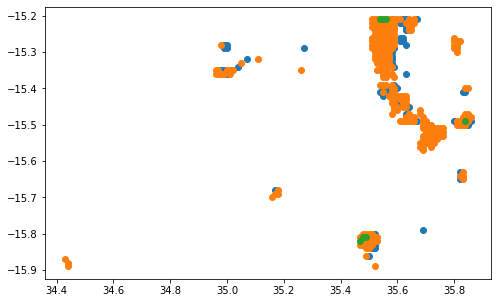

In [59]:
values = []
for i in range(5):
  values.append(df_up.query('target_2019>@i*0.2&target_2019<=(@i+1)*0.2'))
figure = plt.figure(figsize=(8,5))
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2019.max())
plt.show()

In [71]:
!pip install catboost

In [0]:
X = data_old.query('Y<=-15.9').iloc[:,[-4,-1,-2,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
X = pd.DataFrame(X.values, columns = range(23))
X['volume'] = 0
X = X.apply(knull, axis = 1)
X = X.apply(distance, axis = 1)
X = X.iloc[:,[1,2,3,4,5,-1]].rename(columns = {1:'soil_carbon', 2:'wetland_dist', 3:'X', 4:'Y', 5:'elevation'})
y = data_old.query('Y<=-15.9').iloc[:,2]
X_test_2019 = data_old.query('Y<=-15.9').iloc[:,[-4,-1,-2,0,1,3,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
X_test_2019 = pd.DataFrame(X_test_2019.values, columns = range(23))
X_test_2019['volume'] = 0
X_test_2019 = X_test_2019.apply(knull, axis = 1)
X_test_2019 = X_test_2019.apply(distance, axis = 1)
X_test_2019 = X_test_2019.iloc[:,[1,2,3,4,5,-1]].rename(columns = {1:'soil_carbon', 2:'wetland_dist', 3:'X', 4:'Y', 5:'elevation'})

In [97]:
from catboost import CatBoostRegressor
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
fold=KFold(n_splits=25)#15#5#10
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m2  = CatBoostRegressor(n_estimators=500,eval_metric='RMSE',learning_rate=0.1, random_state=42, use_best_model=True )
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200,verbose=100,)#erly100
    preds=m2.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb2.append(np.sqrt(mean_squared_error(y_test,preds)))
    p2 = m2.predict(X_test_2019)
    y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 0.2493627	test: 0.2493627	test1: 0.1180815	best: 0.1180815 (0)	total: 2.87ms	remaining: 1.43s
100:	learn: 0.0896220	test: 0.0896220	test1: 0.0837650	best: 0.0827735 (42)	total: 235ms	remaining: 927ms
200:	learn: 0.0786326	test: 0.0786326	test1: 0.0839443	best: 0.0827735 (42)	total: 454ms	remaining: 675ms
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.08277347967
bestIteration = 42

Shrink model to first 43 iterations.
err:  0.08277347963795251
0:	learn: 0.2488618	test: 0.2488618	test1: 0.0983288	best: 0.0983288 (0)	total: 2.24ms	remaining: 1.12s
100:	learn: 0.0904102	test: 0.0904102	test1: 0.0137822	best: 0.0137594 (97)	total: 220ms	remaining: 868ms
200:	learn: 0.0793263	test: 0.0793263	test1: 0.0122685	best: 0.0121926 (198)	total: 446ms	remaining: 663ms
300:	learn: 0.0723916	test: 0.0723916	test1: 0.0103828	best: 0.0103828 (300)	total: 669ms	remaining: 442ms
400:	learn: 0.0676356	test: 0.0676356	test1: 0.0097849	best: 0.0097849 (400)	total: 889ms	remain

0.09366693336070712

In [117]:
df = pd.DataFrame(data_old.query('Y<=-15.9').iloc[:,[-4,0,1]])
y_cat = np.array(list(map(asminus, np.mean(y_pred_totcb2, 0))))
df['target_2019'] = y_cat
df.head()

,Square_ID,X,Y,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,0.0
1,4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,0.0
9,4e3c389f-14ce-11ea-bce5-f49634744a41,34.27,-15.92,0.0
10,4e3c38a0-14ce-11ea-bce5-f49634744a41,34.27,-15.91,0.0
11,4e3c38a1-14ce-11ea-bce5-f49634744a41,34.27,-15.90,0.0


0 -- 0.19918906223724886
1 -- 0.39498033410481376
2 -- 0.5997835725615226
3 -- 0.7999331919184889
4 -- 1.0


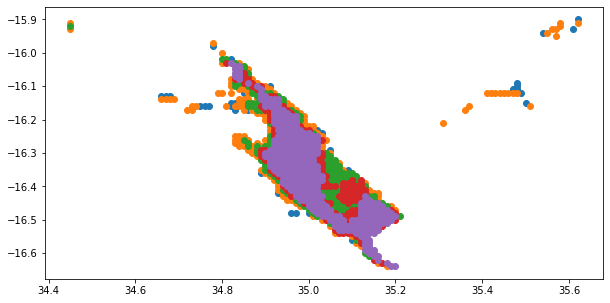

In [118]:
values = []
for i in range(5):
  values.append(df.query('target_2019>@i*0.2&target_2019<=(@i+1)*0.2'))
figure = plt.figure(figsize=(10,5))
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2019.max())
plt.show()

In [121]:
df_up = pd.DataFrame(data_old.query('Y>-15.9').iloc[:,[-4,0,1]])
df_up['target_2019'] = 0.
df_all = pd.concat([df_up,df])
df_all = df_all.merge(best, on=['Square_ID', 'X', 'Y'])
df_all.head()

,Square_ID,X,Y,target_2019,target
0,4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,0.0,0.0
1,4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,0.0,0.0
2,4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,0.0,0.0
3,4e3c389b-14ce-11ea-bce5-f49634744a41,34.26,-15.86,0.0,0.0
4,4e3c389c-14ce-11ea-bce5-f49634744a41,34.26,-15.85,0.0,0.0


In [0]:
df_all['target_2019'] = (df_all.target_2019+df_all.target)/2

In [0]:
df_all.drop(['X', 'Y', 'target'], axis = 1).to_csv('submit_mal.csv', index = False)

In [110]:
df_all.drop(['X', 'Y'], axis = 1)

,Square_ID,target_2019
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.0
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.0
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.0
5,4e3c389b-14ce-11ea-bce5-f49634744a41,0.0
6,4e3c389c-14ce-11ea-bce5-f49634744a41,0.0
...,...,...
16189,4e6f5ced-14ce-11ea-bce5-f49634744a41,0.0
16258,4e6f5d32-14ce-11ea-bce5-f49634744a41,0.0
16259,4e6f5d33-14ce-11ea-bce5-f49634744a41,0.0
16260,4e6f5d34-14ce-11ea-bce5-f49634744a41,0.0


In [47]:
df.drop(['X', 'Y'], axis = 1)

,Square_ID,target_2019
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.0
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.0
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.0
5,4e3c389b-14ce-11ea-bce5-f49634744a41,0.0
6,4e3c389c-14ce-11ea-bce5-f49634744a41,0.0
...,...,...
16189,4e6f5ced-14ce-11ea-bce5-f49634744a41,0.0
16258,4e6f5d32-14ce-11ea-bce5-f49634744a41,0.0
16259,4e6f5d33-14ce-11ea-bce5-f49634744a41,0.0
16260,4e6f5d34-14ce-11ea-bce5-f49634744a41,0.0


In [0]:
df_up = pd.DataFrame(data_old.query('Y>-15.9').iloc[:,[-3,0,1]])
df_up['target_2019'] = 0.
df = pd.concat([df, df_up])

In [0]:
df.drop(['X', 'Y'], axis = 1).to_csv('sub.csv', index =  False)

In [0]:
def asminus(x):
  if x<0.18:
    return 0
  if x>1:
    return 1
  return x

In [0]:
"""Лучшая модель для нижней части координат"""
X = data_old.query('Y<=-15.9').iloc[:,[-4,-1,-2,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
X = pd.DataFrame(X.values, columns = range(23))
X['volume'] = 0
X = X.apply(knull, axis = 1)
X = X.iloc[:,[2,3,4,-1]].rename(columns = {1:'wetland_dist', 2:'X', 3:'Y'})
y = data_old.query('Y<=-15.9').iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
model_lgb_low = lgb.LGBMRegressor(n_estimators=900, max_depth=4, learning_rate=0.2)
model_lgb_low.fit(X_train,y_train)
print('CV =', cross_val_score(model_lgb_low, X_test, y_test, scoring='neg_root_mean_squared_error', cv = 5).mean())
y_pred_lgb = model_lgb_low.predict(X_test)
print("LGB =", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))

CV = -0.10578712428308754
LGB = 0.09357189028408251


In [0]:
X_test_2019 = data_old.query('Y<=-15.9').iloc[:,[-4,-1,-2,0,1,3,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
X_test_2019 = pd.DataFrame(X_test_2019.values, columns = range(23))
X_test_2019['volume'] = 0
X_test_2019 = X_test_2019.apply(knull, axis = 1)
X_test_2019 = X_test_2019.iloc[:,[2,3,4,-1]].rename(columns = {1:'wetland_dist', 2:'X', 3:'Y'})
y_pred_lgb_low = model_lgb_low.predict(X_test_2019)
y_pred_lgb[:10]

array([ 9.31528253e-01,  1.56369966e-04,  1.06361677e-02, -1.88066754e-03,
       -4.26971516e-02,  9.61045996e-01, -4.29517337e-03, -1.97690186e-03,
        1.04650534e+00, -2.61211457e-02])

In [0]:
#Fiting models without CV
"""IT IS BEST MODEL!!!!!!!"""
X = data.query('Y<=-15.9').iloc[:,[-4,-1,-2,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
X = pd.DataFrame(X.values, columns = range(23))
X['volume'] = 0
X = X.apply(knull, axis = 1)
y = data_old.query('Y<=-15.9').iloc[:,2]
mydf = X.iloc[:,[2,3,4,-1]].rename(columns = {2:'wetland_dist', 3:'X', 4:'Y'})
mydf['sum'] = X.iloc[:,6:-1].apply(lambda x: x.sum(), axis = 1)
mydf['mean'] = X.iloc[:,6:-1].apply(lambda x: x.mean(), axis = 1)
mydf['max'] = X.iloc[:,6:-1].apply(lambda x: x.max(), axis = 1)
mydf['var'] = X.iloc[:,6:-1].apply(lambda x: x.var(), axis = 1)
mydf['median'] = X.iloc[:,6:-1].apply(lambda x: x.median(), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(mydf, y, test_size=0.3, random_state = 42)#1000, 20
model_1_low = xgb.XGBRegressor(n_estimators = 300,max_depth = 15, learning_rate = 0.2, random_state = 42, gamma = 0.11, min_child_weight = 15, objective = 'reg:squarederror')#5
model_1_low.fit(X_train, y_train)
y_pred_xgb = model_1_low.predict(X_test)
y_pred_xgb = np.array(list(map(asminus, y_pred_xgb)))
print("XGB =", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
model_2_low = SVR(C = 50)
model_2_low.fit(X_train, y_train)
y_pred_svr = model_2_low.predict(X_test)
y_pred_svr = np.array(list(map(asminus, y_pred_svr)))
print("SVR =", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
y_mean = (y_pred_xgb + y_pred_svr)/2
print("Mean =", np.sqrt(mean_squared_error(y_test, y_mean)))

XGB = 0.10556051260373525
SVR = 0.15972808414469422
Mean = 0.11778784632489957


In [0]:
"""IT IS BEST MODEL!!!!!!!"""
#Mean of three models
X_test_2019 = data.query('Y<=-15.9').iloc[:,[-4,-1,-2,0,1,3,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
X_test_2019 = pd.DataFrame(X_test_2019.values, columns = range(23))
X_test_2019['volume'] = 0
X_test_2019 = X_test_2019.apply(knull, axis = 1)
mydf_test = X_test_2019.iloc[:,[2,3,4,-1]].rename(columns = {2:'wetland_dist', 3:'X', 4:'Y'})
mydf_test['sum'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.sum(), axis = 1)
mydf_test['mean'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.mean(), axis = 1)
mydf_test['max'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.max(), axis = 1)
mydf_test['var'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.var(), axis = 1)
mydf_test['median'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.median(), axis = 1)
df_low = pd.DataFrame(data_old.query('Y<=-15.9').iloc[:,[-3,0,1]])
y_pred = (np.array(list(map(asminus, model_1_low.predict(mydf_test))))
          +np.array(list(map(asminus, y_pred_lgb_low)))
         +np.array(list(map(asminus, model_2_low.predict(mydf_test)))))/3.4
df_low['target_2019'] = np.array(list(map(asminus, y_pred)))
"""Конец модели"""
df_low.head()

,Square_ID,X,Y,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,0.0
1,4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,0.0
9,4e3c389f-14ce-11ea-bce5-f49634744a41,34.27,-15.92,0.0
10,4e3c38a0-14ce-11ea-bce5-f49634744a41,34.27,-15.91,0.0
11,4e3c38a1-14ce-11ea-bce5-f49634744a41,34.27,-15.90,0.0


In [0]:
def deleted(x):
  r = x
  if r[2]>-15.9:
    r[-1] = 0.
  if r[1]>=34.77 and r[1] <=35.3 and r[2]<=-15.9:
    r[-1] = r[-1]*1.2
  if r[1]<34.76:
    r[-1] = 0.
  if r[-1]>1:
    r[-1] = 1.
  return r

0 -- 0.1995953172100295
1 -- 0.3991983552360574
2 -- 0.5996345368142244
3 -- 0.7994652770631892
4 -- 0.8193728615378407


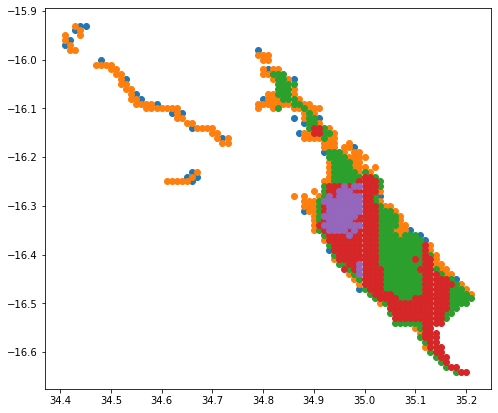

In [0]:
values = []
for i in range(5):
  values.append(df_low.query('target_2019>@i*0.2&target_2019<=(@i+1)*0.2'))
figure = plt.figure(figsize=(8,7))
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2019.max())
plt.show()

In [0]:
"""Склеивание"""
df_all = pd.concat([df_up.apply(deleted, axis = 1), df_low])
#df_all = df_all.apply(deleted, axis = 1)
df['target_2019'] = (df.target_2019 + df_all.target_2019)/2
df.head()

,Square_ID,X,Y,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,0.0
1,4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,0.0
2,4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,0.0
3,4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,0.0
4,4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,0.0


0 -- 0.19992746054800017
1 -- 0.3985881681846424
2 -- 0.5986021415083888
3 -- 0.799247530503902
4 -- 0.8710739587427638


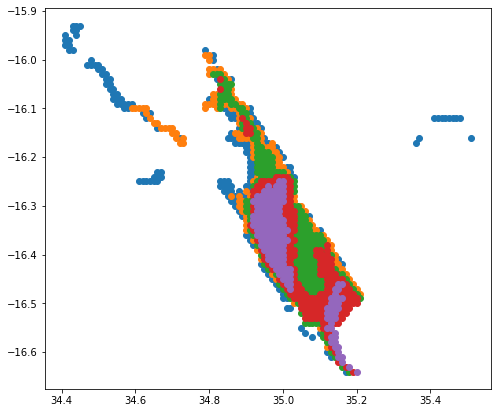

In [0]:
values = []
for i in range(5):
  values.append(df.query('target_2019>@i*0.2&target_2019<=(@i+1)*0.2'))
figure = plt.figure(figsize=(8,7))
for i in range(5):
  plt.scatter(np.array(values[i].X), np.array(values[i].Y))
  print(i, '--', values[i].target_2019.max())
plt.show()

In [0]:
#Make Submission
df.drop(['X', 'Y'], axis = 1).to_csv('Submission_score=.csv', index=False)

In [0]:
#Only one model
X_test_2019 = data.iloc[:,[-4,-1,-2,0,1,3,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
X_test_2019 = pd.DataFrame(X_test_2019.values, columns = range(23))
X_test_2019['volume'] = 0
X_test_2019 = X_test_2019.apply(knull, axis = 1)
mydf_test = X_test_2019.iloc[:,[0,2,3,4,-1]].rename(columns = {0:'LC', 1:'wetland_dist', 2:'X', 3:'Y'})
mydf_test['sum'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.sum(), axis = 1)
mydf_test['mean'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.mean(), axis = 1)
mydf_test['max'] = X_test_2019.iloc[:,6:-1].apply(lambda x: x.max(), axis = 1)
df = pd.DataFrame(data.iloc[:,-3])
y_pred = (np.array(list(map(asminus, model_2.predict(mydf_test))))
         +np.array(list(map(asminus, y_pred_lgb))))/2
df['target_2019'] = y_pred
df = df.apply(asnul, axis = 1)
df.index = df['Square_ID']
df = df.drop(['Square_ID'], axis = 1)
df.head()

,target_2019
Square_ID,
4e3c3896-14ce-11ea-bce5-f49634744a41,0.0
4e3c3897-14ce-11ea-bce5-f49634744a41,0.0
4e3c3898-14ce-11ea-bce5-f49634744a41,0.0
4e3c3899-14ce-11ea-bce5-f49634744a41,0.0
4e3c389a-14ce-11ea-bce5-f49634744a41,0.0


In [0]:
#Make Submission
df.to_csv('Submission.csv', index = False)

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (146 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [0]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.9MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702129 sha256=5d8932d8aa7bfba79c3339702ae6d533ae5b7045fb987eb9b05061464c31f036
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [0]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 306kB/s 
  Using cached https://files.pythonhosted.org/packages/e5/c3/071e080230ac4b6c64f1a2e2f9161c9737a2bc7b683d2c90b024825000c0/pyproj-2.6.1.post1-cp36-cp36m-manylinux2010_x86_64.whl
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


In [0]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
tes = gp.read_file(r'mwi_nhr_naturalshocksrisk_geonode_20140612.shp')
tes

DriverError: ignored

In [0]:
#Our best model
X_train, X_test, y_train, y_test = train_test_split(mydf, y, test_size=0.3, random_state = 42)
model_1 = xgb.XGBRegressor(max_depth = 14, learning_rate = 0.103, random_state = 42, gamma = 0.2, min_child_weight = 12)#14
model_1.fit(X_train, y_train)
y_pred_xgb = model_1.predict(X_test)
y_pred_xgb = np.array(list(map(asminus, y_pred_xgb)))
print("XGB =", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
model_2 = SVR(coef0= 0.8, C = 10000)
model_2.fit(X_train, y_train)
y_pred_svr = model_2.predict(X_test)
y_pred_svr = np.array(list(map(asminus, y_pred_svr)))
print("SVR =", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
y_mean = (y_pred_xgb + y_pred_svr)/2
print("Mean =", np.sqrt(mean_squared_error(y_test, y_mean)))

In [0]:
#Forecasting with best model
X_test_2019 = data.iloc[:,[3,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]]
X_test_2019 = pd.DataFrame(X_test_2019.values, columns = range(19))
X_test_2019['k_null'] = 0
X_test_2019 = X_test_2019.apply(knull, axis = 1)
mydf = X_test_2019.iloc[:,[0,-2,-1]]
mydf = mydf.rename(columns = {0:'elevation', 18:'LC'})
mydf['sum'] = X_test_2019.iloc[:,1:-1].apply(lambda x: x.sum(), axis = 1)
mydf['mean'] = X_test_2019.iloc[:,1:-1].apply(lambda x: x.mean(), axis = 1)
mydf['max'] = X_test_2019.iloc[:,1:-1].apply(lambda x: x.max(), axis = 1)
mydf['k_null'] = X_test_2019['k_null']
df = pd.DataFrame(data.iloc[:,-1])
y_pred = (np.array(list(map(asminus, model_2.predict(mydf)))) + np.array(list(map(asminus, model_1.predict(mydf)))))/2
df['target_2019'] = y_pred
df = df.apply(asnul, axis = 1)
df.index = df['Square_ID']
df = df.drop(['Square_ID'], axis = 1)
df.head()

,target_2019
Square_ID,
4e3c3896-14ce-11ea-bce5-f49634744a41,0.005074
4e3c3897-14ce-11ea-bce5-f49634744a41,0.005074
4e3c3898-14ce-11ea-bce5-f49634744a41,0.026886
4e3c3899-14ce-11ea-bce5-f49634744a41,0.013673
4e3c389a-14ce-11ea-bce5-f49634744a41,0.013673
